In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.target import FeatureCorrelation
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('G5_data1.csv')
df.head()

,no,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1


In [4]:
df = df.drop(['no',], axis=1)
df.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1


# EDA

In [5]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

In [6]:
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
target                int64
dtype: object

In [7]:
X = df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness','tempo', 'valence']]

y = df['target']

In [8]:
df.target.value_counts(normalize=True)

target
1    0.505702
0    0.494298
Name: proportion, dtype: float64

The ratio of values in each class is equal, this highlights that there is no class imbalance and thus the classifier will not be biased towards a particular class.

# Pearson Correlation


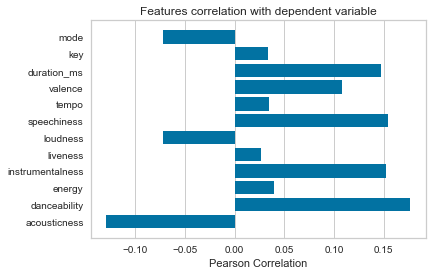

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [9]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = df[feature_names], df['target']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

In [10]:
pearson_corr = df.drop('target', axis=1).corr(method='pearson')
pearson_corr

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630
key,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419


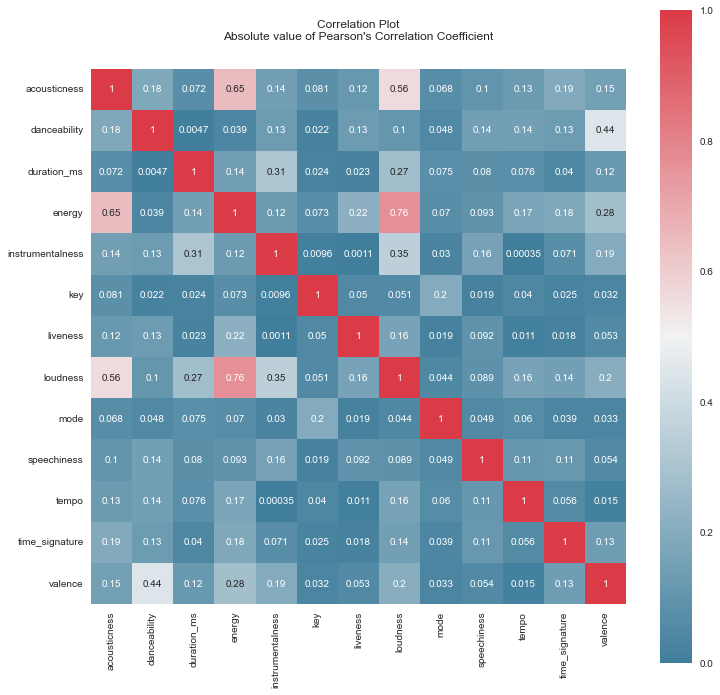

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr.abs(),
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax,
            annot=True)
plt.show()

# Checking feature correspondence

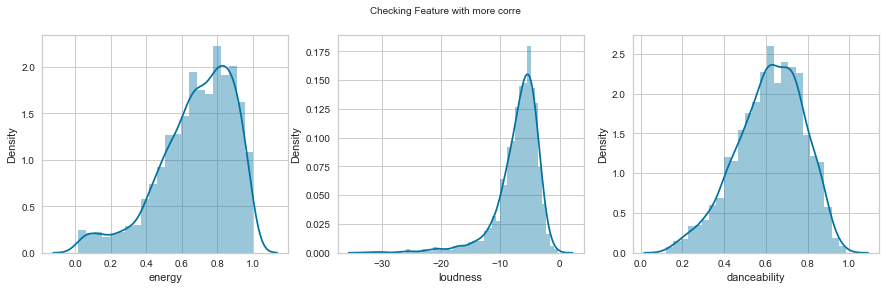

In [12]:
features_o = ['energy','loudness','danceability']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(df['energy'])

plt.subplot(1, 3, 2)
sns.distplot(df['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(df['danceability'])

plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

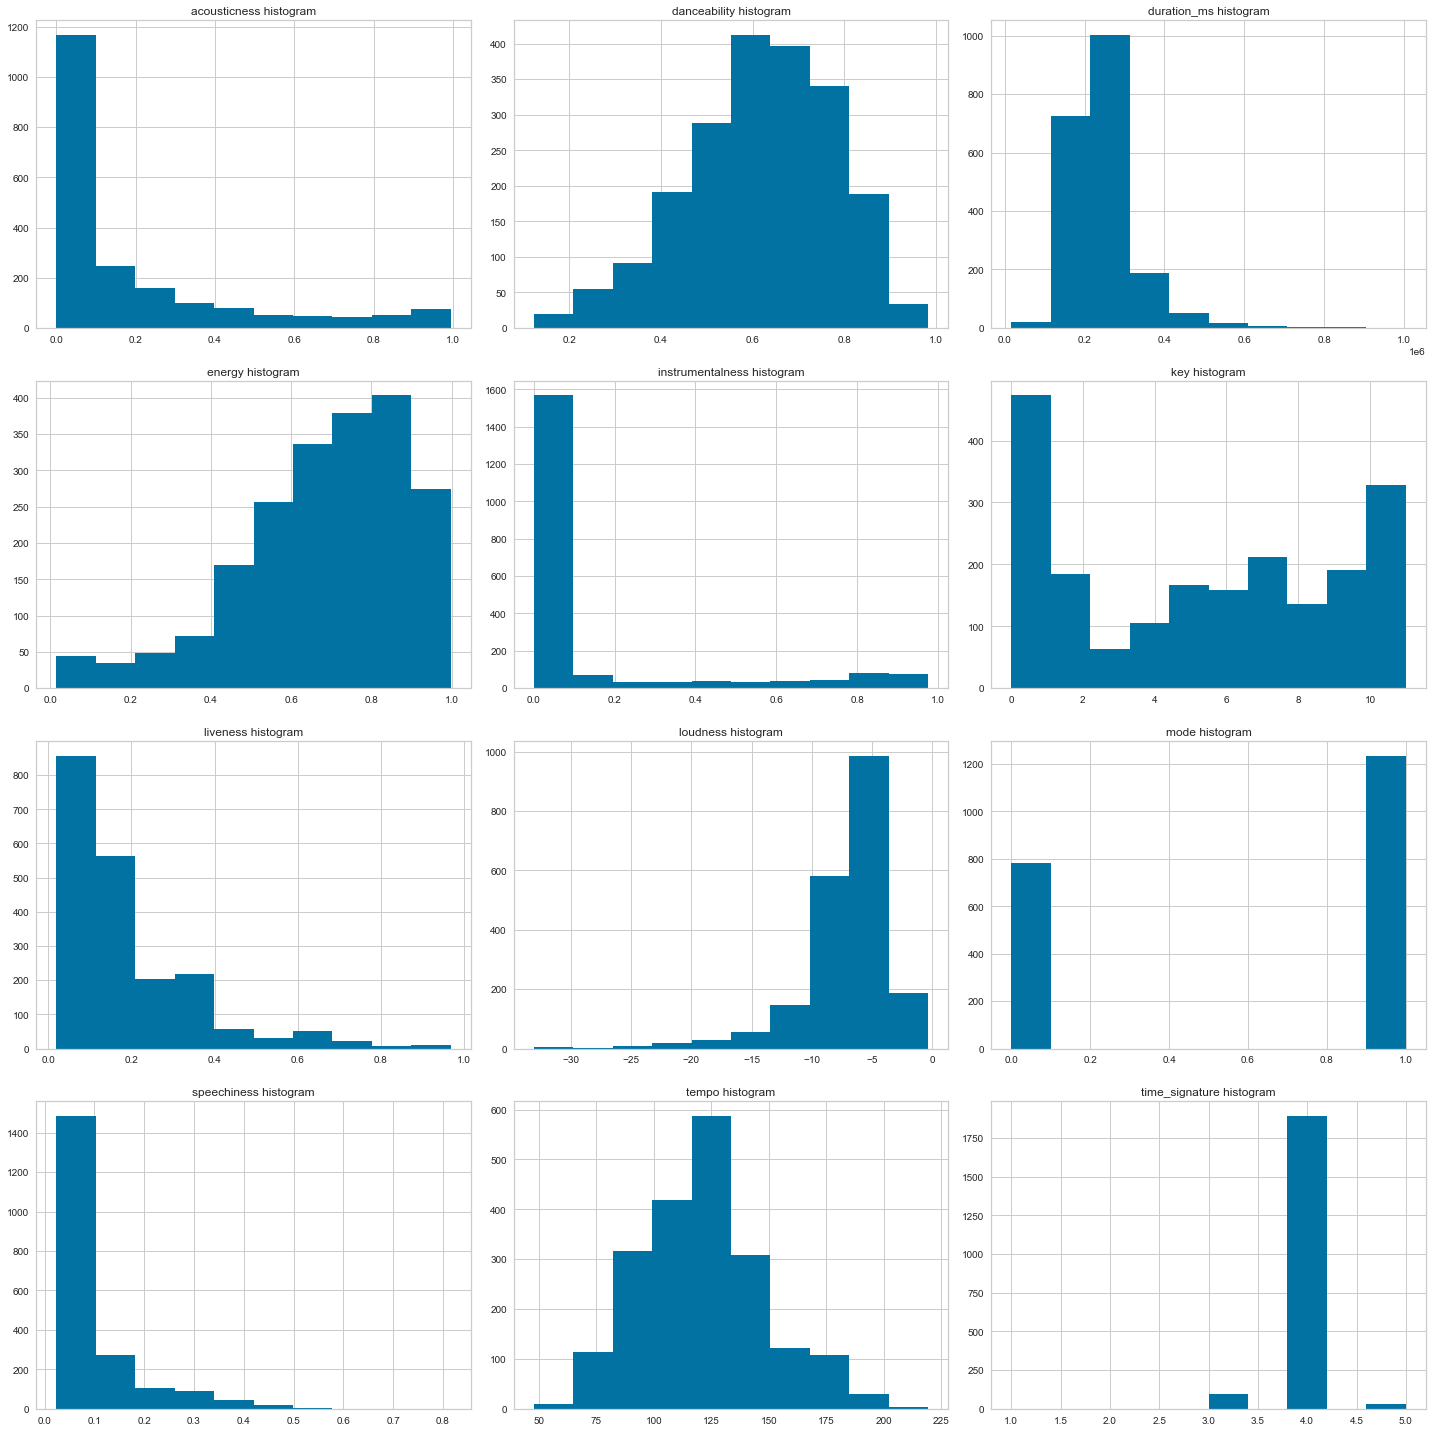

In [13]:
fig, ax = plt.subplots(4,3, figsize=(20,20))

def hist_plot(row=0, column=0, variable=None, binsnum=10, color='b'):
    ax[row, column].hist(df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')

idx = 0
for i in range(0, 4):
  for j in range(0, 3):
    if idx < len(df.columns):
      hist_plot(i, j, df.columns[idx])
      idx += 1 
    
plt.tight_layout()
plt.show()

# Applying Classification & Regression algorithms to the model


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn import *
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

#Making predictions on test set and checking accuracy
y_pred = model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.4f}")

Accuracy: 0.7698


In [17]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy:.4f}")


Accuracy: 0.6856


In [18]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy:.4f}")


Accuracy: 0.6485


In [19]:
#SupportVectorMachine
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_accuracy:.4f}")


Accuracy: 0.7252


In [20]:
data = {
    'Model': ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [svm_accuracy, lr_accuracy, dt_accuracy, rf_accuracy]
}

accuracy_df = pd.DataFrame(data)

# Display the comparison table
print(accuracy_df)

                 Model  Accuracy
0                  SVM  0.725248
1  Logistic Regression  0.648515
2        Decision Tree  0.685644
3        Random Forest  0.769802


In [21]:
rf_model = y_pred
y_pred = model.predict(X_test)

# Generate a classification report for more detailed evaluation

In [22]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       206
           1       0.74      0.67      0.71       198

    accuracy                           0.73       404
   macro avg       0.73      0.72      0.72       404
weighted avg       0.73      0.73      0.72       404



# Visualize the distribution of the target variable (hit or not hit)

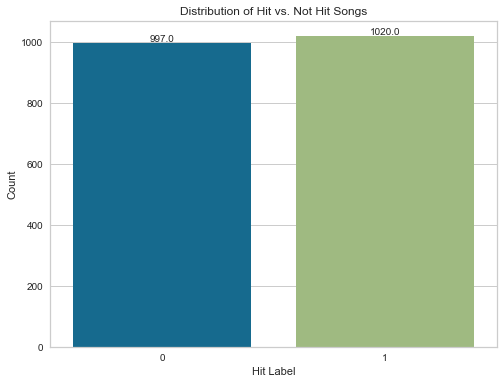

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='target')
plt.title('Distribution of Hit vs. Not Hit Songs')
plt.xlabel('Hit Label')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Visualize the confusion matrix to assess model performance

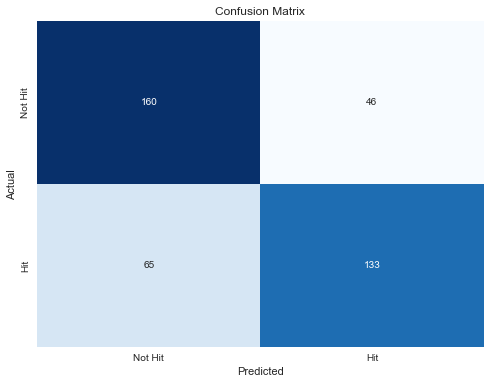

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Not Hit', 'Hit'])
plt.yticks(np.arange(2) + 0.5, ['Not Hit', 'Hit'])
plt.show()

# New song data(Unseen data)

In [25]:
new_song_data = {
    'acousticness': 0.2,
    'danceability': 0.75,
    'duration_ms': 220000,
    'energy': 0.8,
    'instrumentalness': 0.1,
    'key': 4,
    'liveness': 0.65,
    'loudness': 6.0,
    'mode': 1,
    'speechiness': 0.05,
    'tempo': 120,
    'time_signature': 4,
    'valence': 0.7
}

# Convert the extracted features into a DataFrame or a format suitable for model input

In [26]:
new_data_df = pd.DataFrame([new_song_data])

In [27]:
#adding rf model
X = df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

'''accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")'''

'accuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy:.4f}")'

# Make predictions on the new data

In [29]:
predictions = model.predict(new_data_df)

In [30]:
if predictions[0] == 1:
    prediction_result = 'Hit'
else:
    prediction_result = 'Not Hit'

print(f'The predicted result for the new song is: {prediction_result}')

The predicted result for the new song is: Not Hit
